In [68]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner
import random
#%run genetic.ipynb
import math, statistics
import numpy as np


In [69]:
class CaseAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1


    def step(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print ("Hi, I am agent " + str(self.unique_id) +".")
    def print(self):
        print( "id:", self.unique_id, " wealth: ", self.wealth)
        

In [70]:

class CaseModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = 6
        # Create agents
        self.schedule = RadomActivation(self)
        
          # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
        

        self.agents=[] #ADP: have an agents vector directly in Model.
        self.tick=0    #ADP: keep track of time.      
            
    
    def step(self):
        '''Advance the model by one step.'''
        print( "It is now time", self.tick, ".")
        self.schedule.step()
    
        self.tick += 1 # ADP: iterate time.
        
    def print(self): 
        # ADP: Give every object a "print" function.
        print( "Time:", self.tick, ".")
        for a in self.agents:
            a.print()        


In [71]:
def dist( p1, p2):
    runner=0
    if len(p1) == len(p2):
        for i in range(len(p1)):
            runner+= (p1[i]-p2[i])**2
    return math.sqrt(runner)

Try the "markdown"

Ok, now move to CBL setup

In [76]:
m=CaseModel


In [77]:
m.step()

TypeError: step() missing 1 required positional argument: 'self'

In [85]:
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        self.action=[]
        
    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.agents) 
        other_agent.wealth += 1
        self.wealth -= 1
        
        
    def print(self):
        print( "id:", self.unique_id, " wealth: ", self.wealth," prediction: ", self.action)

In [86]:
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N=4):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        
        self.agents=[]
        self.tick=0
        
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            self.agents.append(a)

    def step(self):
        '''Advance the model by one step.'''
  
        self.schedule.step()
        self.tick += 1
        
    def print(self):
        print( "Time:", self.tick, ".")
        for a in self.agents:
            a.print()

In [87]:
m=MoneyModel()

In [88]:
m.print()

Time: 0 .
id: 0  wealth:  1  prediction:  []
id: 1  wealth:  1  prediction:  []
id: 2  wealth:  1  prediction:  []
id: 3  wealth:  1  prediction:  []


In [89]:
m.step()

In [90]:
m.print()

Time: 1 .
id: 0  wealth:  1  prediction:  []
id: 1  wealth:  0  prediction:  []
id: 2  wealth:  1  prediction:  []
id: 3  wealth:  2  prediction:  []


In [92]:
model = MoneyModel(10)
for i in range(10):
    model.step()

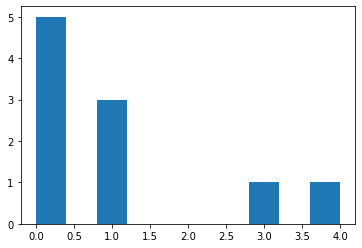

In [93]:
import matplotlib.pyplot as plt

# For jupyter notebook add the following line:
%matplotlib inline

agent_wealth = [a.wealth for a in model.agents]
plt.hist(agent_wealth)
#For a script add the following line
plt.show()

In [97]:
class GeneCase():
    def __init__(self,time=0,info=None,result=0):
        self.info=info
        self.time = time
        self.result=result
        self.pastprice=[]
        self.action
        
    def print(self):
        print("< i:",self.info," , t:", self.time, " , r:", self.result)
        
    def string(self):
        return "< i:" + str(self.info) + " , t:" + str(self.time) + " , r:" + str(self.result)

In [100]:
class GeneMemory(list):
    def __init__(self, contents=None,owner=None, default_value=None, max_length=100):
        
        #you can start a memory with contents if you want:
        #if contents is not None:
            #super().__init__(contents)
       #else:
        super().__init__()
        
        
        self.default_value=default_value
        
        self.owner=owner
        
        self.max_length=max_length

In [101]:
class CBU():
    def __init__(self, self.value):

SyntaxError: invalid syntax (<ipython-input-101-b41743ae9f20>, line 1)